> ## Titanic

> ## 1) imoport the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plot style
sns.set(style="whitegrid")

> ## 2) Load the dataset

In [3]:
# Load the dataset
file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


> ## 3) Data preprocessing and data cleaning

In [5]:
# Check for missing values
print(titanic_data.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# Fill missing values
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].median(), inplace=True)


C:\Users\asus\AppData\Local\Temp\ipykernel_14248\756751542.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_14248\756751542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [7]:
# Drop the 'Cabin' column due to too many missing values
titanic_data.drop('class', axis=1, inplace=True)


In [8]:
# Convert categorical variables into numeric
label_encoder = LabelEncoder()
titanic_data['sex'] = label_encoder.fit_transform(titanic_data['sex'])
titanic_data['embarked'] = label_encoder.fit_transform(titanic_data['embarked'])


In [9]:
# Display the processed data
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,man,True,NaN,Southampton,no,True


> ## 4) Survival count

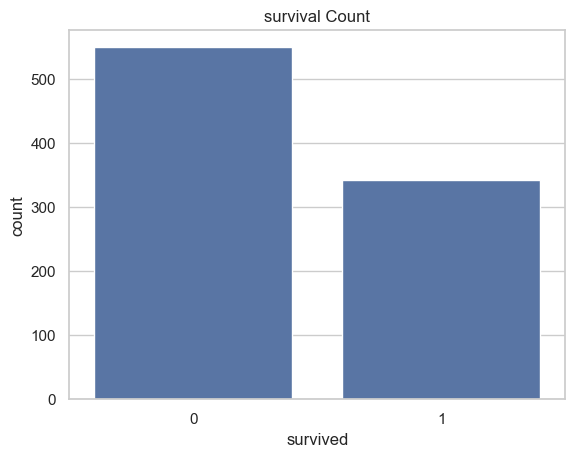

In [10]:
# Plot the distribution of the 'Survived' column
sns.countplot(data=titanic_data, x='survived')
plt.title('survival Count')
plt.show()


> ## Survival count by Gender

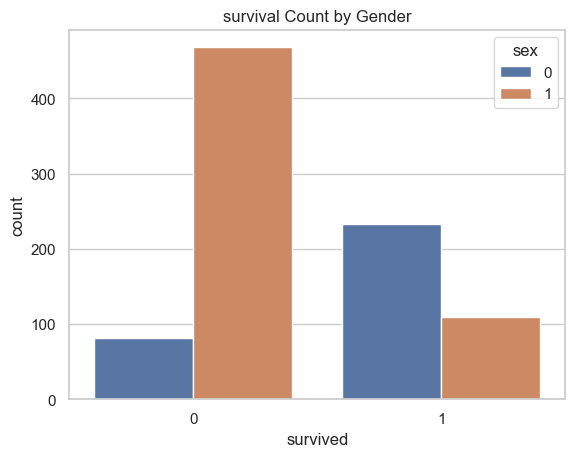

In [11]:
# Plot the distribution of survival by gender
sns.countplot(data=titanic_data, x='survived', hue='sex')
plt.title('survival Count by Gender')
plt.show()


In [12]:
# Select only numeric columns
titanic_data = titanic_data.select_dtypes(include=['int64', 'float64'])

> ## 5) Correlation heatmap

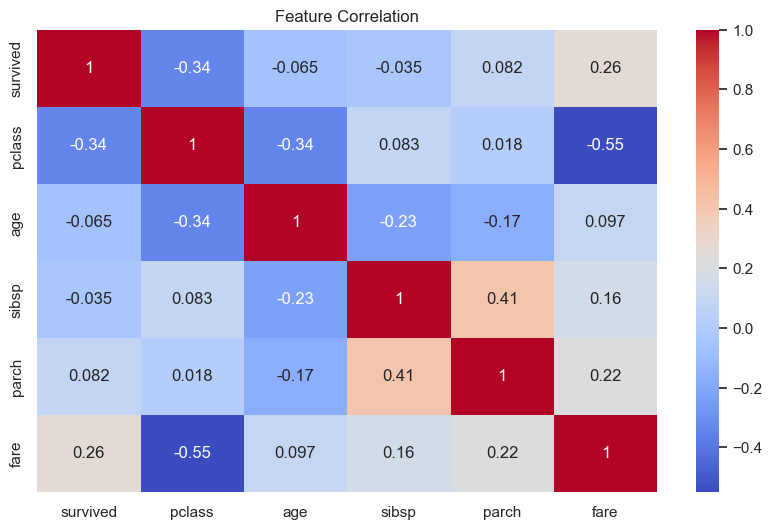

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

> ## 6) Feature Scaling 

In [14]:
# Separate features and target variable
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


> ## 7) Model Training and Evaluation

In [17]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [18]:
# Train and evaluate each model
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[model_name] = accuracy
    
    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression
Accuracy: 73.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179

Confusion Matrix:
[[94 11]
 [37 37]]

Decision Tree
Accuracy: 63.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       105
           1       0.56      0.49      0.52        74

    accuracy                           0.63       179
   macro avg       0.62      0.61      0.61       179
weighted avg       0.63      0.63      0.63       179

Confusion Matrix:
[[77 28]
 [38 36]]

Random Forest
Accuracy: 70.95%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76   

In [19]:
# Compare the accuracy of all models
model_performance_sorted = sorted(model_performance.items(), key=lambda x: x[1], reverse=True)

In [20]:
model_performance_sorted

[('SVM', 0.7430167597765364),
 ('Logistic Regression', 0.7318435754189944),
 ('Random Forest', 0.7094972067039106),
 ('Decision Tree', 0.6312849162011173)]

> ## 8) result of model comparison

In [21]:
# Display comparison results
print("\nModel Comparison:")
for model_name, accuracy in model_performance_sorted:
    print(f"{model_name}: {accuracy * 100:.2f}% accuracy")


Model Comparison:
SVM: 74.30% accuracy
Logistic Regression: 73.18% accuracy
Random Forest: 70.95% accuracy
Decision Tree: 63.13% accuracy


> ## 9) Pie chart for survival distribution

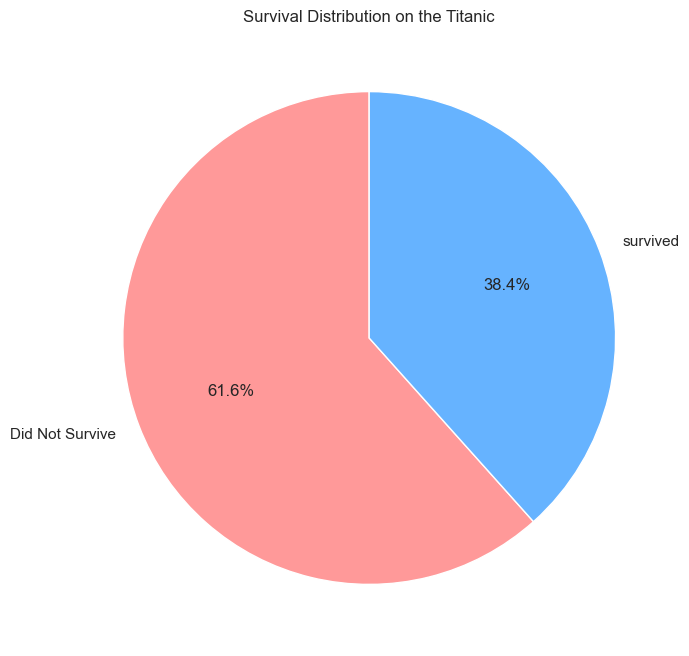

In [65]:
# Count the occurrences of each class in the 'Survived' column
survived_counts = titanic_data['survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Did Not Survive', 'survived'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Survival Distribution on the Titanic')
plt.show()


> ## 10) COMPARISON BAR PLOT

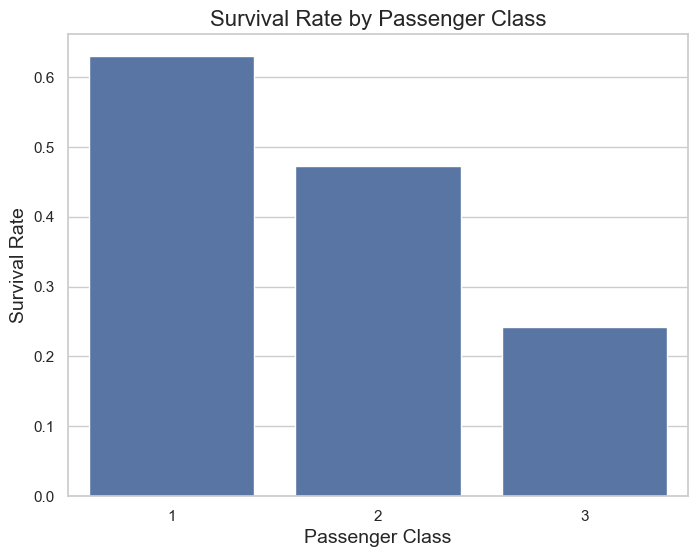

In [78]:
# Create a comparison bar plot for Pclass vs. Survived
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=titanic_data, errorbar=None)

# Add titles and labels
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

# Display the plot
plt.show()
